In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [31]:
print(x)
y=y.reshape(len(y),1)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [32]:
# we always have to feature scaling in SVR
# reshape y bcoz feature scaling expects 2Darray
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)
print(x)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [33]:
# training model
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') #rbf - radial basis function
#many kernels but gaussian rbf is used mostly
regressor.fit(x,y)
 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
# prediction
ans = regressor.predict(sc_x.transform([[6.5]]))
# now apply reverse scaling
ans =sc_y.inverse_transform(ans)
print(ans)

[170370.0204065]


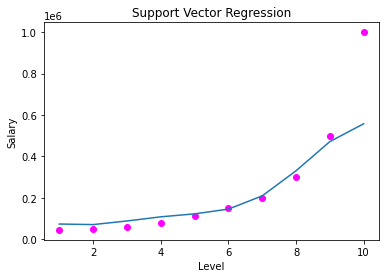

In [42]:
# visualising
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='magenta')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x)))
plt.title('Support Vector Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

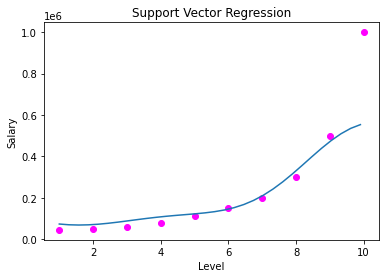

In [45]:
# high resolution graph
x_grid = np.arange(min(x),max(x),0.1)
x_grid = x_grid.reshape(len(x_grid),1)

plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='magenta')
plt.plot(sc_x.inverse_transform(x_grid),sc_y.inverse_transform(regressor.predict(x_grid)))
plt.title('Support Vector Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()